In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Data Preprocessing and augmentation using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    'Dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
val_generator = val_datagen.flow_from_directory(
    'Dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 879 images belonging to 12 classes.
Found 879 images belonging to 12 classes.


In [3]:
# Define CNN Model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))


C:\Users\Manish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [5]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)


Epoch 1/30


C:\Users\Manish\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 574ms/step - accuracy: 0.2023 - loss: 8.8207 - val_accuracy: 0.1206 - val_loss: 4.1156
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 553ms/step - accuracy: 0.2811 - loss: 3.0658 - val_accuracy: 0.0910 - val_loss: 10.3397
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 548ms/step - accuracy: 0.3028 - loss: 2.2337 - val_accuracy: 0.0910 - val_loss: 12.7282
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 542ms/step - accuracy: 0.3883 - loss: 1.8700 - val_accuracy: 0.1069 - val_loss: 10.4989
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 545ms/step - accuracy: 0.4247 - loss: 1.8054 - val_accuracy: 0.0557 - val_loss: 15.8321
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 559ms/step - accuracy: 0.4735 - loss: 1.5924 - val_accuracy: 0.0250 - val_loss: 16.6510
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 597ms/step - accuracy: 0.4719 - loss: 1.6411 - val_accuracy: 0.0114 - val_loss: 20.5130
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 557ms/step - accuracy: 0.4878 - loss: 1.7014 - val_accuracy:

In [6]:
model.save_weights('best_model2.weights.h5')


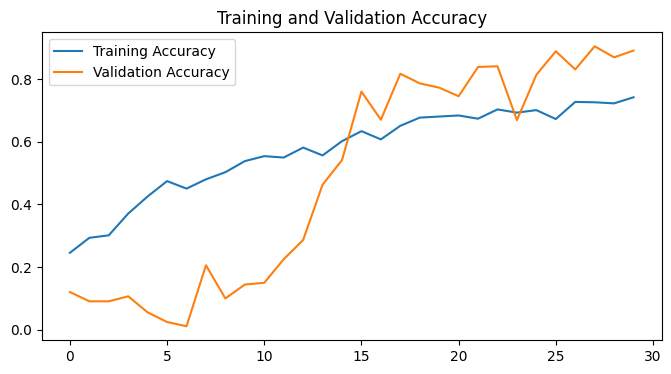

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [8]:
model.load_weights('best_model.weights.h5')
loss, acc = model.evaluate(val_generator)
print(f"\n✅ Final Validation Accuracy: {(acc*100):.2f}%")


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.8941 - loss: 0.2995

✅ Final Validation Accuracy: 89.08%


In [9]:
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=1)

print("\n📌 Classification Report:\n", classification_report(y_true, y_pred))



28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        80
           1       0.90      0.91      0.90        78
           2       0.93      0.90      0.91        77
           3       0.82      0.78      0.79        80
           4       0.93      0.84      0.88        76
           5       0.81      0.88      0.84        80
           6       0.74      0.93      0.82        80
           7       1.00      0.89      0.94        80
           8       0.89      0.95      0.92        80
           9       0.95      0.93      0.94        80
          10       0.94      0.86      0.90        78
          11       1.00      1.00      1.00        10

    accuracy                           0.89       879
   macro avg       0.90      0.90      0.90       879
weighted avg       0.90      0.89      0.89       879

